In [7]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob
import pickle
import textwrap

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own data wrappers
from imp import reload
import measureclass as mc; reload(mc);
import coronadataclass as cdc; reload(cdc);
import crossvalidationclass as cvc; reload(cvc);

np.seterr(divide = 'ignore');


In [8]:
crossval_rt_removeEurope     = cvc.CrossValidation(RemoveContinent = 'Europe',     ExternalObservableFile = 'COVID19_data_PAPER_VERSION.csv', resolve_US_states = True, FinalDateFromDB = True, FinalDateExtendWithShiftdays = True)
crossval_rt_removeAsia       = cvc.CrossValidation(RemoveContinent = 'Asia',       ExternalObservableFile = 'COVID19_data_PAPER_VERSION.csv', resolve_US_states = True, FinalDateFromDB = True, FinalDateExtendWithShiftdays = True)
crossval_rt_removeAmericas   = cvc.CrossValidation(RemoveContinent = 'Americas',   ExternalObservableFile = 'COVID19_data_PAPER_VERSION.csv', resolve_US_states = True, FinalDateFromDB = True, FinalDateExtendWithShiftdays = True)
crossval_rt_DateDistribution = cvc.CrossValidation(DateRandomize = 'Distribution', ExternalObservableFile = 'COVID19_data_PAPER_VERSION.csv', resolve_US_states = True, FinalDateFromDB = True, FinalDateExtendWithShiftdays = True)
crossval_rt_DateRandom       = cvc.CrossValidation(DateRandomize = 'Random',       ExternalObservableFile = 'COVID19_data_PAPER_VERSION.csv', resolve_US_states = True, FinalDateFromDB = True, FinalDateExtendWithShiftdays = True)



In [9]:
shiftdaylist = np.arange(10) * 2
alphalist = np.power(10, np.linspace(-4, -1, num = 7))
crossvalcount = 10

crossval_rt_removeEurope.RunCV    (shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_rt_removeAsia.RunCV      (shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_rt_removeAmericas.RunCV  (shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_rt_DateDistribution.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_rt_DateRandom.RunCV      (shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)


  0 0.000100        14:52:25
  0 0.000316        14:52:50
  0 0.001000        14:53:12
  0 0.003162        14:53:29
  0 0.010000        14:53:39
  0 0.031623        14:53:46
  0 0.100000        14:53:51
  2 0.000100        14:54:24
  2 0.000316        14:54:52
  2 0.001000        14:55:15
  2 0.003162        14:55:32
  2 0.010000        14:55:43
  2 0.031623        14:55:49
  2 0.100000        14:55:55
  4 0.000100        14:56:30
  4 0.000316        14:56:59
  4 0.001000        14:57:23
  4 0.003162        14:57:41
  4 0.010000        14:57:51
  4 0.031623        14:57:57
  4 0.100000        14:58:03
  6 0.000100        14:58:38
  6 0.000316        14:59:09
  6 0.001000        14:59:33
  6 0.003162        14:59:49
  6 0.010000        14:59:59
  6 0.031623        15:00:06
  6 0.100000        15:00:11
  8 0.000100        15:00:48
  8 0.000316        15:01:18
  8 0.001000        15:01:42
  8 0.003162        15:02:00
  8 0.010000        15:02:09
  8 0.031623        15:02:17
  8 0.100000  

  0 0.001000        16:52:58
  0 0.003162        16:53:30
  0 0.010000        16:53:48
  0 0.031623        16:54:00
  0 0.100000        16:54:08
  2 0.000100        16:55:20
  2 0.000316        16:56:16
  2 0.001000        16:57:04
  2 0.003162        16:57:41
  2 0.010000        16:58:05
  2 0.031623        16:58:18
  2 0.100000        16:58:25
  4 0.000100        16:59:36
  4 0.000316        17:00:30
  4 0.001000        17:01:17
  4 0.003162        17:01:47
  4 0.010000        17:02:04
  4 0.031623        17:02:19
  4 0.100000        17:02:27
  6 0.000100        17:03:57
  6 0.000316        17:04:58
  6 0.001000        17:05:48
  6 0.003162        17:06:20
  6 0.010000        17:06:37
  6 0.031623        17:06:50
  6 0.100000        17:06:59
  8 0.000100        17:08:19
  8 0.000316        17:09:15
  8 0.001000        17:09:59
  8 0.003162        17:10:27
  8 0.010000        17:10:44
  8 0.031623        17:10:55
  8 0.100000        17:11:02
 10 0.000100        17:12:40
 10 0.000316  

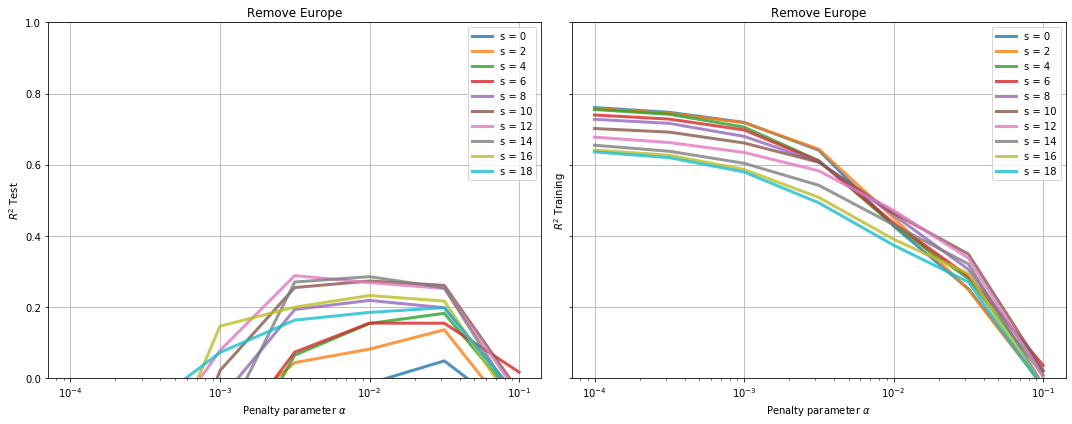

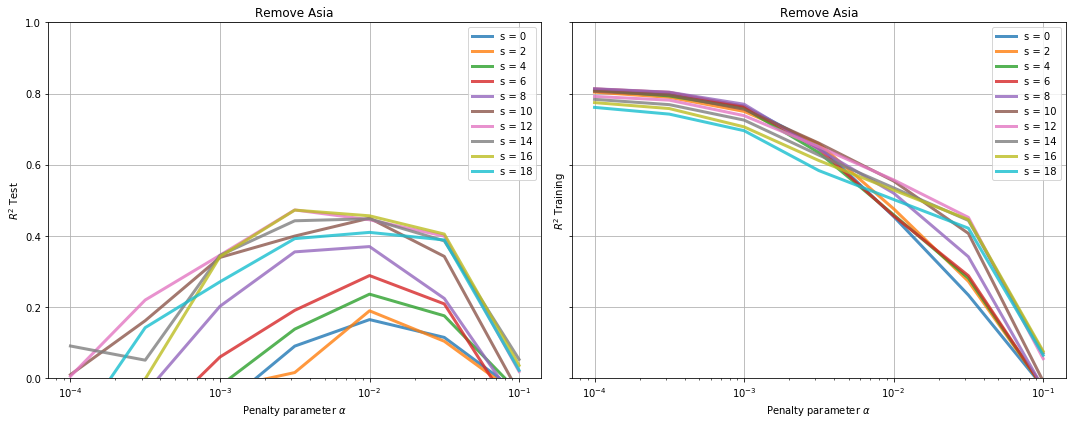

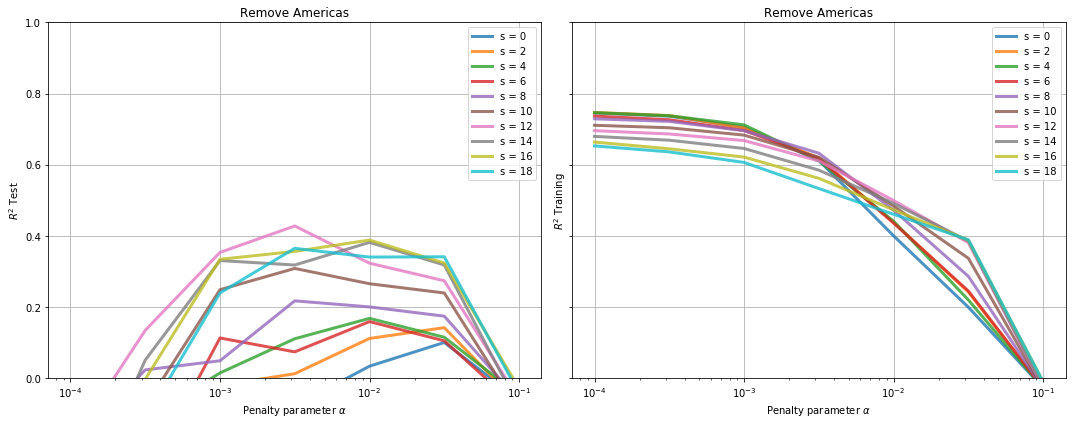

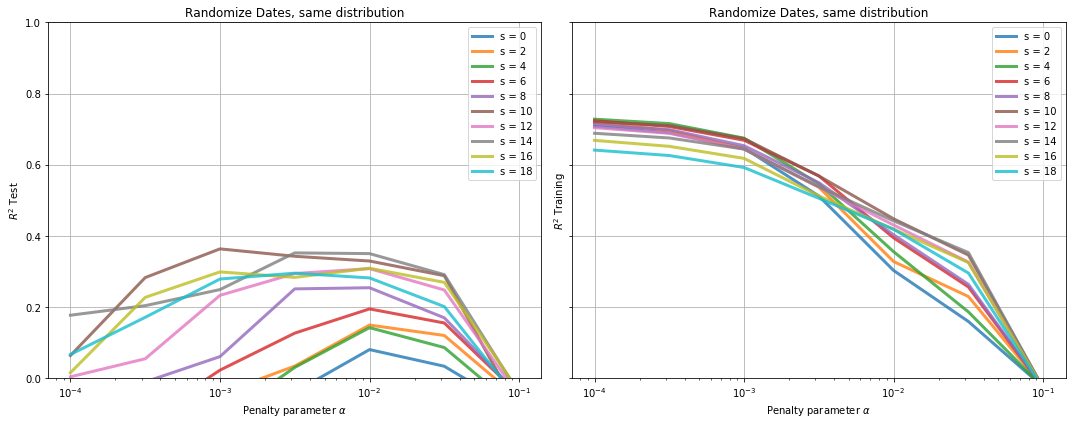

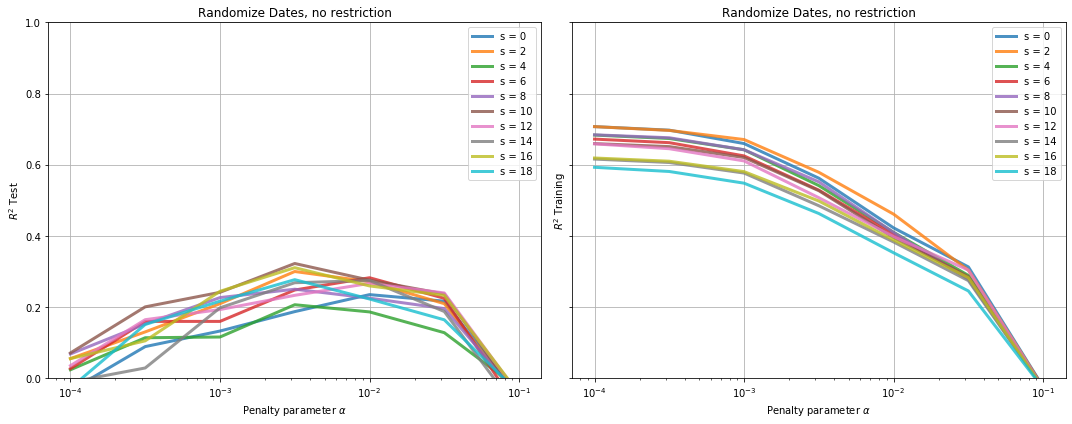

In [11]:
crossval_rt_removeEurope.PlotCVresults(title = 'Remove Europe')
crossval_rt_removeAsia.PlotCVresults(title = 'Remove Asia')
crossval_rt_removeAmericas.PlotCVresults(title = 'Remove Americas')
crossval_rt_DateDistribution.PlotCVresults(title = 'Randomize Dates, same distribution')
crossval_rt_DateRandom.PlotCVresults(title = 'Randomize Dates, no restriction')


In [12]:
pickle.dump(crossval_rt_DateDistribution,open('pickle/cv_datedistr_200601.pickle','wb'))
pickle.dump(crossval_rt_DateRandom,open('pickle/cv_daterandom_200601.pickle','wb'))
pickle.dump(crossval_rt_removeAmericas,open('pickle/cv_rAmer_200601.pickle','wb'))
pickle.dump(crossval_rt_removeEurope,open('pickle/cv_rEuro_200601.pickle','wb'))
pickle.dump(crossval_rt_removeAsia,open('pickle/cv_rAsia_200601.pickle','wb'))


In [18]:
print('Remove Americas')
print(crossval_rt_removeAmericas.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending = False).head(10))
print('Remove Europe')
print(crossval_rt_removeEurope.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending = False).head(10))
print('Remove Asia')
print(crossval_rt_removeAsia.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending = False).head(10))
print('Date Distribution')
print(crossval_rt_DateDistribution.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending = False).head(10))
print('Date Random')
print(crossval_rt_DateRandom.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending = False).head(10))


Remove Americas
    shiftdays     alpha  R2 Test Weighted  R2 Test Avgd
47         12  0.003162          0.427508      0.432072
57         16  0.010000          0.387876      0.392876
50         14  0.010000          0.381362      0.316600
68         18  0.003162          0.364672      0.360403
61         16  0.003162          0.355998      0.283432
44         12  0.001000          0.353175      0.321723
67         18  0.031623          0.340938      0.366569
64         18  0.010000          0.340012      0.307946
58         16  0.001000          0.333765      0.318452
51         14  0.001000          0.330274      0.323061
Remove Europe
    shiftdays     alpha  R2 Test Weighted  R2 Test Avgd
47         12  0.003162          0.287980      0.213900
50         14  0.010000          0.285039      0.274476
36         10  0.010000          0.272819      0.259159
54         14  0.003162          0.269850      0.246790
43         12  0.010000          0.268333      0.230324
39         10  0.0

In [19]:
crossval_rt_removeAmericas.ComputeFinalModels(modelparameters=[(12,10**-2.5)])
crossval_rt_removeAsia.ComputeFinalModels(modelparameters=[(12,10**-2.5)])
crossval_rt_removeEurope.ComputeFinalModels(modelparameters=[(12,10**-2.5)])

crossval_rt_DateDistribution.ComputeFinalModels(modelparameters=[(10,10**-3)])
crossval_rt_DateRandom.ComputeFinalModels(modelparameters=[(10,10**-2.5)])


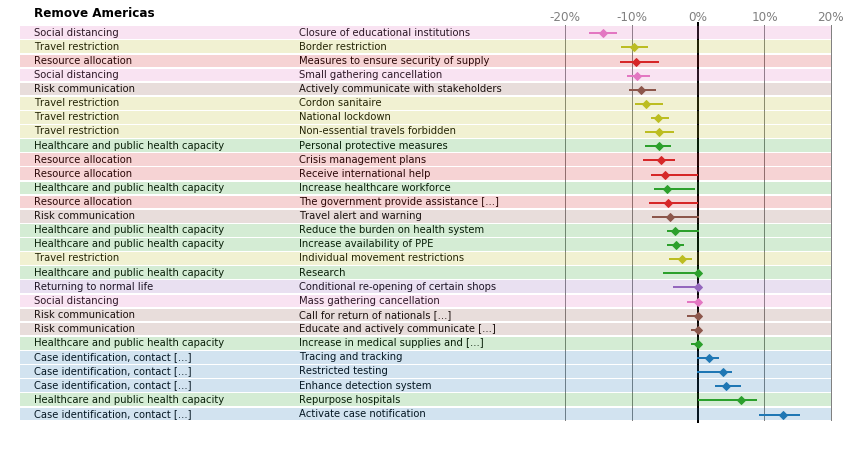

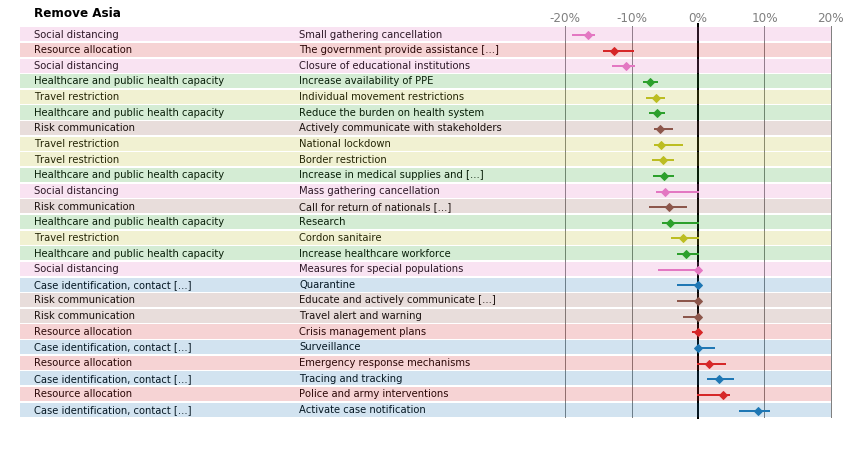

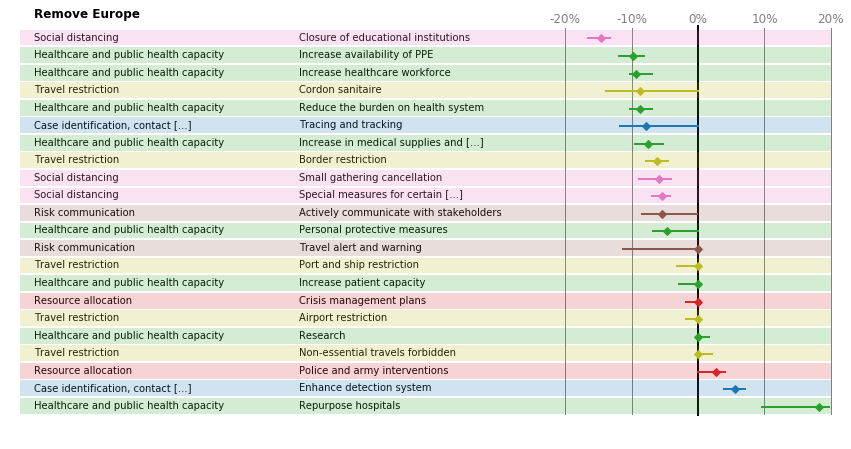

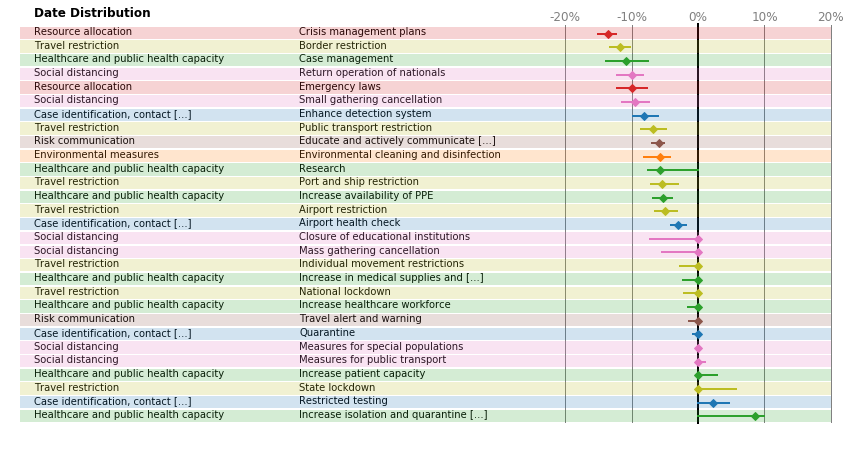

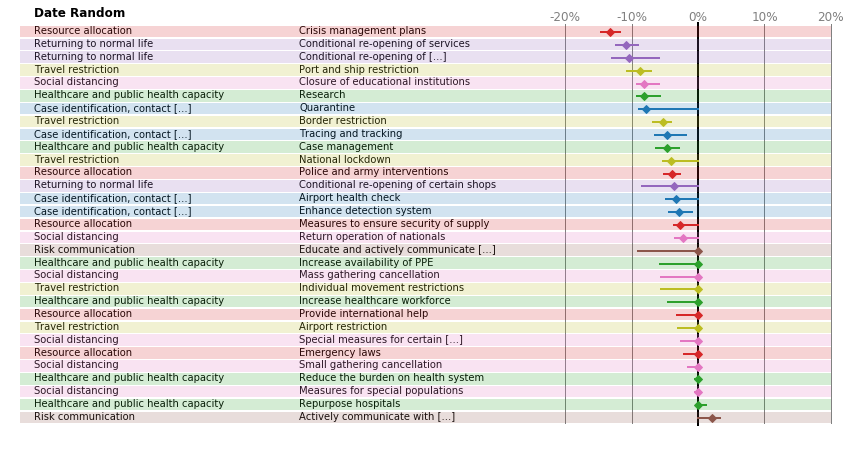

In [32]:
crossval_rt_removeAmericas.PlotMeasureListSorted(drop_zeros=True,figsize = (15,8),title = 'Remove Americas',graylines=[-20,-10,10,20])
crossval_rt_removeAsia.PlotMeasureListSorted(drop_zeros=True,figsize = (15,8),title = 'Remove Asia',graylines=[-20,-10,10,20])
crossval_rt_removeEurope.PlotMeasureListSorted(drop_zeros=True,figsize = (15,8),title = 'Remove Europe',graylines=[-20,-10,10,20])

crossval_rt_DateDistribution.PlotMeasureListSorted(drop_zeros=True,figsize = (15,8),title = 'Date Distribution',graylines=[-20,-10,10,20])
crossval_rt_DateRandom.PlotMeasureListSorted(drop_zeros=True,figsize = (15,8),title = 'Date Random',graylines=[-20,-10,10,20])
